In [ ]:
pip install plotly

Python interpreter will be restarted.
Requirement already satisfied: plotly in /databricks/python3/lib/python3.8/site-packages (5.3.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from plotly) (1.15.0)
Requirement already satisfied: tenacity>=6.2.0 in /databricks/python3/lib/python3.8/site-packages (from plotly) (8.0.1)
Python interpreter will be restarted.

#START

Importing NLTK

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Package omw-1.4 is already up-to-date!
Out[1]: True

## Get Data

Importing data from snowflake

In [ ]:
# snowflake connection options
options = {
"sfUrl": ".snowflakecomputing.com",
"sfUser": "",
"sfPassword": "",
"sfDatabase": "",
"sfSchema": "",
"sfWarehouse": ""
}

In [ ]:
# Build Query
sql_query = f"""
SELECT
 TOP 150 *  from "VW_GAME_DESCRIPTION_MASTER" 
  WHERE GAMETITLE is not NULL and TITLE  not like 'laperladelcasino' and TITLE  not like 'sabadodeluxe'
"""
# Generate a simple dataset
df = spark.read \
.format("snowflake") \
.options(**options) \
.option("query", sql_query ) \
.load()

df.show()

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 TITLE| GAMEDESCRIPTION| GAMEINSTRUCTIONS| GAMETITLE| SEODESCRIPTION| SEOKEYWORDS| SEOTITLE|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 40_joker_staxx|<p>Are you a fan ...|<p>This classic s...|CLASSIC ONLINE SL...|Recall the experi...|casino slots, cla...|Classic Free Onli...|
 7diamond_c6a|<p>One of the mos...|<p>7 DIAMOND is a...|7 Diamond - FREE ...|Relive the experi...|7 Diamond, crista...|7 Diamond - Crist...|
 9_happy_pharaohs|<p>The team of an...|<p>In this slot y...|Slot Machine Casi...|Meet a never-befo...| null|9 Happy Pharaohs ...|
 alkemors_tower|<p>You don't need...|<p>Dust off your ...|Video Slot Magic ...|There is plenty o...|video slot, slot ...|Alkemor's Towers ...|
 anubis|<p>If you like th...|<p>In this free s...|ANUBIS: PLAY ONLI...|Play free online ...|free online slot ...|Free online slot ...|
 art_of_the_heist|<p>Help Vincenzo ...|<p>In this slot m...|SLOT MACHINE WITH...|Learn from the be...|slots casino, Art...|Art of the Heist ...|
 blackjack|<p>Blackjack is a...|<p>When the game ...|21 European Black...|Who hasn’t played...|poker, blackjack,...|Blackjack Online ...|
 blackjack_us|<p>Blackjack is a...|<p>When the game ...|21 European Black...|Who hasn’t played...| null|Blackjack Online ...|
 blazeofra|<p>The powerful G...|<p>In this video ...|EGYPTIAN VIDEO SL...|Use the Sun God's...| null|Blaze of Ra - Egy...|
 blood_eternal|<p>If you like sl...|<p>This video slo...|Vampire Video Slo...|Spin the 6 reels ...| null|Blood Eternal - V...|
 book_of_gold|<p>The mysterious...|<p>In this slot m...|Free 5-reel Slot ...|Enjoy playing Boo...|slots casino, Boo...|Free 5-reel Slot ...|
 book_of_gold_choice|<p>Ancient Egypt ...|<p>In this slot m...|Egyptian Slot - B...|Enjoy playing the...| null|Ancient Egyptian ...|
book_of_gold_mult...|<p>Take a trip to...|<p>Book Of Gold: ...|Book Of Gold: Mul...|Travel to ancient...|book of gold, mul...|Book Of Gold: Mul...|
 buffalo_power|<p>Relive the wil...|<p>In this online...|Buffalo Power - W...|Have you ever wan...| null|Buffalo Power - W...|
 bumper_crop|<p>Do you like th...|<p>This slot cons...|FARM SLOT MACHINE...|Become a powerful...| null|Bumper Crop - Far...|
 burlesque_queen|<p>Do you know th...|<p>In this slot m...|Free Casino Slot ...|The Moulin Rouge ...|casino slots, cas...|Casino Slots Onli...|
 burning_wins|<p>Do you love cl...|<p>This classic s...|CLASSIC SLOT MACH...|Relive the experi...|casino slots, cla...|Burning Wins - Cl...|
 carnaval_forever|<p>Did you know t...|<p>Carnaval Forev...|Carnaval Rio de J...|Join the Brazilia...|carnival forever,...|Carnaval Forever ...|
 chicago_gangsters|<p>Chicago Gangst...|<p>In this video ...|VideoSlots Free O...|Travel back in ti...|video slots, vide...|VideoSlots Free O...|
 christmas_eve|<p>Yo-ho-ho! Chri...|<p>This Christmas...|Christmas VIDEO S...|Christmas Eve is ...|casino slots, vid...|Christmas Eve - C...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 20 rows

## Import Libraries

Importing Libraries

In [ ]:
from gensim.models import Word2Vec
import pandas as pd 
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import remove_stopwords
from textblob import TextBlob, Word
from gensim.utils import tokenize
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import numpy as np
from wordcloud import WordCloud
import seaborn as sn
from gensim.test.utils import common_texts

from sklearn.metrics import silhouette_score

In [ ]:
Dataset = df.toPandas()

In [ ]:
Dataset.where(Dataset['TITLE'] == 'fruitsinferno')

Out[6]:

,TITLE,GAMEDESCRIPTION,GAMEINSTRUCTIONS,GAMETITLE,SEODESCRIPTION,SEOKEYWORDS,SEOTITLE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Dataset['TITLE']

Out[7]: 0 40_joker_staxx
1 7diamond_c6a
2 9_happy_pharaohs
3 alkemors_tower
4 anubis
 ... 
145 the_slotfather_2
146 tigers_claw
147 tiggers_claw
148 tikitumble
149 time_warp
Name: TITLE, Length: 150, dtype: object

In [ ]:
Dataset['Combine'] = Dataset["GAMEDESCRIPTION"]+Dataset['GAMEINSTRUCTIONS']

## Preprocessing

Preprocessing includes:
  - Remove HTML Tags
  - Lower Case letter
  - Remove stop words / gensim and personal
  - lemmanize
  
We execute the combination of GAMEDESCRIPTION + GAMEINSTRUCTION to have bigger dataset

In [ ]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    ret  = re.sub(clean, '', text)
    return ret

In [ ]:
def lower(text):
  return text.lower()

In [ ]:
def removeStopWords(text):
  return  [word for word in text if not word in stopwords.words()]

In [ ]:
def lemmanize(text):
  sent = TextBlob(text)
  return " ". join([w.lemmatize() for w in sent.words])

In [ ]:
def tok(text):
  return list(tokenize(text))
 

In [ ]:
def removeSpecialWords(text):

  mystopwords = ['ll', 'nbsp','slot','game','prize','scatter','classig','play','casino','betting'
                 ,'win','winning','symbol','scatter','bonus','bonuses','winning','figures','3x5','table','machine','screen','blackjack','poker','multiplier'
                ,'spin','bet','prize','bar','love','grid','combination','classic','paid','line','set','pay','figure',                              'button','free','level','player','reel','five','gift','mode','freespins','spins','seven','blue','green','red','triple',
                'appear','rich','place','online','reward','lines', 'symbol','betting','joker',' staxx','prizes','prize','jokers','incredible','wild', 'vertically' ,'horizontally','position','random','board','fun','enjoy','happy','engergise','energy']#,'slot','machine','game', 'play' , 'get', 'waiting', 'try']
 
  for word in list(text):  # iterating on a copy since removing will mess things up
      if word in mystopwords:
          text.remove(word)

  return text

In [ ]:
#Not using it yet
new_stopwords = [x for x in stopwords.words() if x != 'you']

In [ ]:
"""
Preprocessing function passing the whole description
"""
def Preprocessing(Description):
  CleanDesc = remove_html_tags(Description)
  CleanDesc = lower(CleanDesc)
  CleanDesc = tok(CleanDesc)
  filtered_sentence = removeStopWords(CleanDesc)
  
  lemmatized_out = lemmanize(' '.join(filtered_sentence))
  #lem =tok(filtered_sentence)

  lem =  removeSpecialWords(lemmatized_out.split())
  return lem 
#lem = Preprocessing(Dataset['Combine'][0])


In [ ]:
""" 
Executing preprocessing for each description in 'Combine'
"""
words_text = []
for i in range(0,150):
  words_text.append(Preprocessing(Dataset['Combine'][i]))



## Glove - Word2Vec Model

Applying Glove Pretrained model

In [ ]:

embedding_dict = {}
f = open('/dbfs/FileStore/shared_uploads/gburguesl@cirsa.com/glove_6B_100d-1.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embedding_dict[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embedding_dict))


Loaded 400000 word vectors.

In [ ]:
#Allocating 100 word as length for ever sentence. 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(words_text)
sequences = tokenizer.texts_to_sequences(words_text)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
#Truncating means removal of rest of words remaining in the sentence of the corpus and padding the left words.
#Not using this
#data = pad_sequences(sequences, maxlen=100, truncating='post', padding = 'post')

Found 2525 unique tokens.

In [ ]:
from tqdm import tqdm
#Creating an embedding matrix containing words with respective vectors

num_words  =len(word_index) +1 
embedding_matrix = np.zeros((num_words, 100))

for word, i in tqdm(word_index.items()):
  print("word: ", word)
  if i > num_words:
    continue
  embedding_vector = embedding_dict.get(word)
  if embedding_vector is not None:
    print(embedding_vector)
    embedding_matrix[i] = embedding_vector

0%| | 0/2525 [00:00<?, ?it/s]word: get
[ 0.14433 0.43951 0.58324 -0.74477 -0.49797 0.086928
 -0.29798 0.39964 0.14083 -0.36578 0.33322 0.47181
 0.1996 0.18278 0.17176 -0.34297 0.04252 0.39309
 -0.66272 0.62738 0.22845 0.44657 0.11174 -0.41396
 0.079795 0.078823 -0.26135 -0.80966 0.52807 -0.47327
 0.055901 0.85753 0.19722 0.30782 0.39039 0.31804
 -0.53604 0.1835 0.081918 0.27753 -0.25792 -0.37158
 -0.2215 -1.0916 -0.52179 0.12665 -0.48591 -0.26716
 0.37119 -1.0525 -0.30202 -0.16279 -0.32528 0.95493
 0.14915 -2.4934 0.27505 0.16308 1.8972 0.21172
 0.10776 1.1318 -0.85962 0.060199 0.83713 0.030006
 0.59344 0.42821 -0.13722 -0.49128 0.0043155 -0.51829
 -0.059878 -0.58476 0.062621 0.31269 -0.52613 -0.35209
 -0.49959 -0.13117 0.62349 -0.092936 -0.92224 -0.32487
 -1.8286 -0.1284 0.50507 -0.034628 -0.79806 -0.49739
 -0.096325 -0.17695 -0.036351 -0.75977 -0.49938 -0.20278
 0.34232 0.50134 0.49536 0.4992 ]
word: like
[-0.2687 0.81708 0.69896 -0.72341 0.091566 0.19557 -0.52112
 -0.24313 -0.44701 -0.27039 -0.34126 -0.46898 0.42583 0.46289
 0.17106 -0.26795 0.23162 0.46568 -0.31808 0.75875 0.31857
 0.64124 0.067042 -0.18517 0.49996 0.36964 -0.31172 -0.73098
 -0.26902 -0.32058 0.23394 0.24276 0.1426 -0.2793 0.38823
 0.42398 0.1021 0.33316 0.3015 -0.52711 -0.024475 -0.15301
 -0.3224 -0.51231 -0.5525 0.29819 0.10847 0.052334 -0.2298
 -0.77889 -0.08928 0.48109 0.015368 0.92544 -0.26122 -2.4759
 -0.019825 0.58281 1.306 0.73512 -0.34372 1.5829 -0.10814
 0.11388 0.7922 0.18347 1.2232 0.35697 0.17504 -0.16527
 -0.012827 -0.47918 -0.32111 -0.40573 -0.37151 0.086323 0.25172
 -0.082751 -0.25584 -0.19178 1.0474 -0.51984 -0.71463 0.38827
 -1.6722 0.015986 -0.22668 -0.26602 -0.57925 -0.85651 0.20543
 -0.46372 -0.065652 -0.061944 -0.57233 -0.46406 -0.41405 -0.4011
 0.74657 0.31122 ]
word: three
[-6.8609e-02 3.7234e-01 8.2630e-03 -2.9759e-01 5.0497e-01 3.5530e-01
 3.9532e-01 8.0128e-01 -9.2972e-01 3.7341e-02 7.0599e-01 1.0559e-01
 2.9726e-01 7.6445e-01 2.1428e-01 -1.1708e-01 -1.6907e-01 -4.5694e-03
 -6.2429e-01 3.4949e-01 9.1536e-01 -2.0154e-01 1.3332e-01 5.4897e-01
 7.0493e-01 -9.6237e-01 -1.7229e-01 -4.5547e-01 -3.0551e-01 3.0407e-01
 1.4562e-01 -4.6100e-02 -1.9556e-01 -2.8577e-01 3.7451e-01 2.6128e-01
 -1.2611e-01 2.5810e-01 -4.0324e-01 5.0019e-01 -4.8305e-01 -1.4809e-01
 5.3787e-01 -1.1960e-01 3.7295e-01 3.5746e-01 -7.7718e-02 -7.6393e-01
 -1.7623e-01 -1.6575e-03 -7.2068e-01 -5.3102e-01 -6.4924e-02 1.3585e+00
 -7.8425e-02 -2.5510e+00 1.2289e-01 -7.6388e-02 1.8927e+00 1.5580e+00
 -7.1005e-01 1.0358e+00 2.5433e-01 4.2906e-01 3.4181e-01 2.4824e-01
 3.3564e-01 5.9503e-01 -2.8889e-03 1.2437e-01 -4.7407e-01 3.6503e-02
 -4.9999e-02 -3.1483e-01 1.6067e-01 4.5478e-01 -4.1619e-01 -3.5707e-01
 -1.0044e+00 -1.5895e-01 1.1112e+00 3.1304e-01 -3.8909e-01 4.2518e-01
 -1.3821e+00 -2.8304e-02 1.5420e-01 -1.7196e-01 1.6381e-01 4.6067e-02
 -2.0830e-01 2.4300e-01 -6.5808e-01 -1.0197e-01 -1.3277e+00 1.4797e-01
 -6.6992e-01 6.2075e-02 4.6644e-01 -1.7181e-01]
word: right
[ 1.0060e-01 2.0405e-01 4.6027e-01 -6.1584e-01 -3.1460e-01 5.9874e-01
 -5.1974e-01 -3.6454e-01 -5.7500e-02 1.1387e-02 5.9460e-02 1.0890e-01
 6.9055e-01 -9.6085e-02 2.5253e-01 -1.6050e-01 -3.2447e-01 2.8349e-01
 -5.4160e-01 1.1315e-03 5.9300e-01 4.8945e-01 -6.3187e-02 -1.6199e-01
 7.5422e-01 1.8403e-01 -4.4059e-01 -9.2566e-01 6.3593e-01 -2.3815e-01
 3.0404e-01 1.1023e+00 4.7050e-01 1.3797e-01 1.6553e-01 3.1744e-02
 -3.6064e-01 5.0744e-01 -3.8172e-01 -6.8022e-02 5.9017e-02 9.9114e-02
 6.2605e-01 -5.8257e-01 -9.2806e-01 -5.2826e-01 1.3443e-01 -1.2114e-01
 -3.0145e-01 -1.9401e-01 3.6958e-01 4.9245e-01 -2.1664e-01 7.5818e-01
 -1.6476e-01 -2.6160e+00 2.9193e-01 1.3506e-02 2.2676e+00 7.6083e-01
 2.1532e-01 7.0252e-01 -5.0722e-01 4.9768e-01 1.1843e+00 2.6868e-01
 5.6544e-01 1.0854e-01 -8.0930e-01 -4.0130e-01 2.5977e-02 1.7244e-01
 8.1071e-03 -9.4537e-01 4.8240e-01 -4.3172e-01 -8.6337e-01 1.6363e-01
 -1.7601e-01 -8.7241e-02 1.1431e-01 2.0619e-01 -7.1245e-01 -1.4193e-01
 -9.4202e-01 -4.7558e-01 3.9271e-01 6.9967e-01 1

In [ ]:
embedding_dict.get('machine')

Out[21]: array([-0.65365 , 0.49419 , -0.26245 , -0.20722 , -0.11413 ,
 0.35701 , 1.0454 , 0.21881 , 0.52769 , 0.60606 ,
 0.42521 , -0.65169 , 0.15318 , -0.14797 , 0.12651 ,
 -0.017124 , 0.45325 , 0.37166 , -0.26847 , -0.2627 ,
 0.43869 , -0.016615 , 0.12714 , -0.54708 , 0.089084 ,
 0.24336 , -0.34415 , 0.0026505, -0.094268 , 0.056114 ,
 0.46366 , 0.68786 , -0.20631 , -0.088003 , 0.32153 ,
 -0.91399 , -0.080976 , -0.90761 , 0.92889 , -0.68033 ,
 0.23801 , -0.37469 , -0.43278 , -0.19243 , -0.23711 ,
 -0.73041 , -0.50592 , -0.30237 , 0.0017281, -0.60923 ,
 -0.21046 , 0.47403 , 0.37333 , 1.2475 , 0.6299 ,
 -1.5292 , -0.32403 , 0.59681 , 0.97994 , 0.59756 ,
 0.67625 , 0.28223 , -0.26748 , 1.425 , -0.34419 ,
 0.25212 , 0.3024 , -0.26582 , -0.22583 , 0.53783 ,
 -0.44439 , -0.24281 , 0.38001 , 0.085317 , 0.49694 ,
 0.24058 , 0.20611 , 0.023896 , -0.53078 , 0.12086 ,
 1.1627 , -0.0053908, -0.66132 , 0.073666 , -1.5987 ,
 0.3626 , 0.68496 , -0.93403 , 0.30523 , -0.1688 ,
 0.43895 , 0.73641 , 0.56431 , 1.0804 , 0.074377 ,
 -0.89155 , -0.20935 , -0.3041 , 1.3027 , 0.1273 ],
 dtype=float32)

In [ ]:
dict_vec = {}
for i in range(0,150):
  check = []
  for j in words_text[i][:]:
      print(j)
      print("esto es {}".format(i) , j , ' and  embedding_dict ', embedding_dict.get(j))
      if embedding_dict.get(j) is not None:
        check.append(embedding_dict.get(j))
        dict_vec[i] = check
      
  

fan
esto es 0 fan and embedding_dict [ 0.17379 0.25769 0.024536 -0.92853 -0.13053 0.92387
 0.25318 -0.63233 0.23499 0.0075372 -0.77793 -0.31312
 0.058652 -0.67262 -0.11301 -0.46862 0.33277 -0.12727
 0.053753 0.25048 0.20814 0.16397 -0.79137 -0.1584
 0.87201 0.027197 0.031539 0.063152 0.6791 0.33141
 -0.32604 0.88533 0.8044 0.86361 0.11556 -0.031355
 -0.012902 0.56023 -0.20579 -0.33475 0.040393 -0.30971
 0.24828 -0.58003 0.83202 -0.51174 -0.45455 -0.28548
 0.94183 -0.66331 0.4223 -0.28905 -0.10244 0.37231
 0.53467 -1.5937 0.15855 0.52149 0.95929 0.7983
 0.20485 0.71883 -0.78628 0.59022 0.61297 -0.054023
 0.67273 -0.063905 -0.02016 0.44583 0.47405 -0.12135
 0.27213 -0.52859 -0.63107 0.32923 0.91874 -0.21986
 -0.11238 0.4657 0.35437 -0.050335 -0.49387 -0.54628
 -0.58725 -0.38412 -1.0252 -0.040295 0.0036313 -0.0035793
 -0.15308 0.51828 0.31521 -0.055597 0.43681 -0.29708
 -0.69984 -0.14951 0.84536 -0.31795 ]
staxx
esto es 0 staxx and embedding_dict None
elegant
esto es 0 elegant and embedding_dict [-1.6793e-01 4.1604e-01 1.5100e-01 7.7931e-01 1.4573e-01 1.0088e+00
 1.3422e-01 4.1758e-01 -4.8192e-01 1.0052e+00 -2.1608e-02 -3.7152e-01
 -8.5531e-04 2.1093e-02 -9.7570e-02 4.2913e-01 -3.5820e-02 8.9167e-02
 4.2993e-01 -2.3457e-01 1.6009e-01 1.7447e-01 8.4783e-02 -1.0514e+00
 7.6653e-01 6.4205e-02 -6.7817e-01 -6.2814e-01 -9.7590e-01 -7.7208e-01
 -1.9586e-01 -1.9140e-01 -3.2568e-02 -8.3018e-01 6.9522e-01 7.4564e-01
 1.2142e-01 -1.8777e-01 2.1688e-01 -2.3975e-01 7.4525e-01 -5.5891e-01
 4.6432e-02 1.3116e-01 2.0289e-01 2.3692e-01 3.2467e-01 3.7572e-01
 5.1194e-01 2.5578e-01 1.5884e-01 -3.3892e-01 7.3877e-01 -1.2824e-02
 -5.8199e-01 -1.6869e+00 -7.7130e-02 5.3444e-01 2.8601e-01 -4.3873e-01
 -5.4135e-01 5.5921e-01 -1.1435e-02 7.0715e-02 1.1941e-01 -9.1085e-01
 7.2305e-01 -2.7237e-01 -3.4374e-01 -9.2643e-01 1.9267e-02 1.5590e-01
 1.3422e-01 -5.6139e-01 5.4806e-01 1.5011e-02 -9.3673e-02 -9.9035e-02
 4.9740e-01 -7.0103e-01 -2.1079e-02 1.0880e-01 3.0654e-01 5.0492e-02
 -5.2983e-01 -7.6629e-03 2.7625e-01 -1.6964e-01 -4.0064e-01 -7.0241e-01
 8.3335e-01 -3.3727e-01 5.2388e-01 -1.5245e-01 -6.3977e-01 -2.1872e-01
 -1.2014e+00 -1.0923e+00 1.0694e-01 6.6397e-01]
x
esto es 0 x and embedding_dict [-0.67212 1.1458 0.12519 0.19952 -0.39315 0.33718 0.5201
 -0.15572 -0.33985 0.22342 0.95812 -0.80619 0.46807 -0.56215
 0.44596 0.24495 -0.087304 1.3327 -0.71722 0.45057 -0.15811
 -0.099305 -0.13445 1.1753 0.5825 0.99031 1.0862 -0.23455
 0.40067 -0.029061 0.89291 0.089762 -0.53367 1.1238 0.4902
 0.20711 0.30766 0.25482 0.75024 0.68642 0.28429 -1.0786
 0.18878 -0.69493 -0.46758 -0.10616 -0.69971 0.1313 -0.043326
 0.4316 -0.048832 0.62417 0.53646 0.9837 -0.50914 -2.0855
 -0.23882 0.47396 0.82951 0.34906 -0.4674 0.3927 -0.37313
 0.028256 0.7173 0.81749 -0.34132 0.63578 0.58216 0.51497
 -0.51773 -0.060168 -0.39114 1.0411 1.1063 -0.54461 0.16112
 0.064514 -0.9073 -0.68471 -0.053346 -0.59435 -0.062462 0.14322
 -0.51916 0.7042 0.50722 -1.1287 0.38835 0.29836 -0.4253
 1.3999 0.37627 0.1792 0.07392 -0.072332 -0.13556 -0.57917
 0.41294 -0.71662 ]
put
esto es 0 put and embedding_dict [-0.37539 -0.016581 -0.0086693 -0.51518 -0.031009 0.23342
 -0.22957 -0.14879 -0.42592 0.081239 0.31618 0.34686
 -0.15926 -0.11959 -0.15275 0.075458 0.03985 0.58443
 -0.49918 -0.2659 0.35206 0.01327 0.12554 -0.047439
 0.12313 -0.12901 -0.4719 -0.45888 -0.092613 -0.45026
 -0.06843 0.58078 -0.026525 0.28213 -0.20462 0.29924
 -0.17651 0.10685 -0.28247 -0.14234 -0.51908 -0.48465
 0.26334 -0.64752 -0.25346 -0.0041614 -0.1797 -0.11559
 -0.19136 -0.76514 0.067615 0.030696 -0.35203 1.18
 -0.2938 -2.7164 -0.14442 -0.12116 1.4706 0.60209
 0.29555 0.53632 -0.61479 0.23923 0.68626 0.12452
 0.2351 0.77179 -0.33592 -0.11823 0.24227 -0.086415
 0.083274 -0.39732 0.43861 0.16705 -0.36955 -0.10234
 -0.52015 0.20461 0.82374 -0.068325 -0.56793 -0.011534
 -1.1537 -0.22371 0.16447 0.51493 -0.36527 -0.29484
 -0.095429 -0.30282 -0.064341 -0.54027 -0.74767 -0.42845
 0.096076 0.036921 0.2582 0.0072172]
together
esto es 0 

In [ ]:
dict_vec

Out[23]: {0: [array([ 0.17379 , 0.25769 , 0.024536 , -0.92853 , -0.13053 ,
 0.92387 , 0.25318 , -0.63233 , 0.23499 , 0.0075372,
 -0.77793 , -0.31312 , 0.058652 , -0.67262 , -0.11301 ,
 -0.46862 , 0.33277 , -0.12727 , 0.053753 , 0.25048 ,
 0.20814 , 0.16397 , -0.79137 , -0.1584 , 0.87201 ,
 0.027197 , 0.031539 , 0.063152 , 0.6791 , 0.33141 ,
 -0.32604 , 0.88533 , 0.8044 , 0.86361 , 0.11556 ,
 -0.031355 , -0.012902 , 0.56023 , -0.20579 , -0.33475 ,
 0.040393 , -0.30971 , 0.24828 , -0.58003 , 0.83202 ,
 -0.51174 , -0.45455 , -0.28548 , 0.94183 , -0.66331 ,
 0.4223 , -0.28905 , -0.10244 , 0.37231 , 0.53467 ,
 -1.5937 , 0.15855 , 0.52149 , 0.95929 , 0.7983 ,
 0.20485 , 0.71883 , -0.78628 , 0.59022 , 0.61297 ,
 -0.054023 , 0.67273 , -0.063905 , -0.02016 , 0.44583 ,
 0.47405 , -0.12135 , 0.27213 , -0.52859 , -0.63107 ,
 0.32923 , 0.91874 , -0.21986 , -0.11238 , 0.4657 ,
 0.35437 , -0.050335 , -0.49387 , -0.54628 , -0.58725 ,
 -0.38412 , -1.0252 , -0.040295 , 0.0036313, -0.0035793,
 -0.15308 , 0.51828 , 0.31521 , -0.055597 , 0.43681 ,
 -0.29708 , -0.69984 , -0.14951 , 0.84536 , -0.31795 ],
 dtype=float32),
 array([-1.6793e-01, 4.1604e-01, 1.5100e-01, 7.7931e-01, 1.4573e-01,
 1.0088e+00, 1.3422e-01, 4.1758e-01, -4.8192e-01, 1.0052e+00,
 -2.1608e-02, -3.7152e-01, -8.5531e-04, 2.1093e-02, -9.7570e-02,
 4.2913e-01, -3.5820e-02, 8.9167e-02, 4.2993e-01, -2.3457e-01,
 1.6009e-01, 1.7447e-01, 8.4783e-02, -1.0514e+00, 7.6653e-01,
 6.4205e-02, -6.7817e-01, -6.2814e-01, -9.7590e-01, -7.7208e-01,
 -1.9586e-01, -1.9140e-01, -3.2568e-02, -8.3018e-01, 6.9522e-01,
 7.4564e-01, 1.2142e-01, -1.8777e-01, 2.1688e-01, -2.3975e-01,
 7.4525e-01, -5.5891e-01, 4.6432e-02, 1.3116e-01, 2.0289e-01,
 2.3692e-01, 3.2467e-01, 3.7572e-01, 5.1194e-01, 2.5578e-01,
 1.5884e-01, -3.3892e-01, 7.3877e-01, -1.2824e-02, -5.8199e-01,
 -1.6869e+00, -7.7130e-02, 5.3444e-01, 2.8601e-01, -4.3873e-01,
 -5.4135e-01, 5.5921e-01, -1.1435e-02, 7.0715e-02, 1.1941e-01,
 -9.1085e-01, 7.2305e-01, -2.7237e-01, -3.4374e-01, -9.2643e-01,
 1.9267e-02, 1.5590e-01, 1.3422e-01, -5.6139e-01, 5.4806e-01,
 1.5011e-02, -9.3673e-02, -9.9035e-02, 4.9740e-01, -7.0103e-01,
 -2.1079e-02, 1.0880e-01, 3.0654e-01, 5.0492e-02, -5.2983e-01,
 -7.6629e-03, 2.7625e-01, -1.6964e-01, -4.0064e-01, -7.0241e-01,
 8.3335e-01, -3.3727e-01, 5.2388e-01, -1.5245e-01, -6.3977e-01,
 -2.1872e-01, -1.2014e+00, -1.0923e+00, 1.0694e-01, 6.6397e-01],
 dtype=float32),
 array([-0.67212 , 1.1458 , 0.12519 , 0.19952 , -0.39315 , 0.33718 ,
 0.5201 , -0.15572 , -0.33985 , 0.22342 , 0.95812 , -0.80619 ,
 0.46807 , -0.56215 , 0.44596 , 0.24495 , -0.087304, 1.3327 ,
 -0.71722 , 0.45057 , -0.15811 , -0.099305, -0.13445 , 1.1753 ,
 0.5825 , 0.99031 , 1.0862 , -0.23455 , 0.40067 , -0.029061,
 0.89291 , 0.089762, -0.53367 , 1.1238 , 0.4902 , 0.20711 ,
 0.30766 , 0.25482 , 0.75024 , 0.68642 , 0.28429 , -1.0786 ,
 0.18878 , -0.69493 , -0.46758 , -0.10616 , -0.69971 , 0.1313 ,
 -0.043326, 0.4316 , -0.048832, 0.62417 , 0.53646 , 0.9837 ,
 -0.50914 , -2.0855 , -0.23882 , 0.47396 , 0.82951 , 0.34906 ,
 -0.4674 , 0.3927 , -0.37313 , 0.028256, 0.7173 , 0.81749 ,
 -0.34132 , 0.63578 , 0.58216 , 0.51497 , -0.51773 , -0.060168,
 -0.39114 , 1.0411 , 1.1063 , -0.54461 , 0.16112 , 0.064514,
 -0.9073 , -0.68471 , -0.053346, -0.59435 , -0.062462, 0.14322 ,
 -0.51916 , 0.7042 , 0.50722 , -1.1287 , 0.38835 , 0.29836 ,
 -0.4253 , 1.3999 , 0.37627 , 0.1792 , 0.07392 , -0.072332,
 -0.13556 , -0.57917 , 0.41294 , -0.71662 ], dtype=float32),
 array([-0.37539 , -0.016581 , -0.0086693, -0.51518 , -0.031009 ,
 0.23342 , -0.22957 , -0.14879 , -0.42592 , 0.081239 ,
 0.31618 , 0.34686 , -0.15926 , -0.11959 , -0.15275 ,
 0.075458 , 0.03985 , 0.58443 , -0.49918 , -0.2659 ,
 0.35206 , 0.01327 , 0.12554 , -0.047439 , 0.12313 ,
 -0.12901 , -0.4719 , -0.45888 , -0.092613 , -0.45026 ,
 -0.06843 , 0.58078 , -0.026525 , 0.28213 , -0.20462 ,
 0.29924 , -0.17651 , 0.10685 , -0.28247 , -0.14234 ,
 -0.51908 , -0.48465 , 0.26334 , -0.64752 , -0.25346 ,
 -0.0041614, -0.1797 , -0.1155

In [ ]:
dict_vec[0]

Out[24]: [array([ 0.17379 , 0.25769 , 0.024536 , -0.92853 , -0.13053 ,
 0.92387 , 0.25318 , -0.63233 , 0.23499 , 0.0075372,
 -0.77793 , -0.31312 , 0.058652 , -0.67262 , -0.11301 ,
 -0.46862 , 0.33277 , -0.12727 , 0.053753 , 0.25048 ,
 0.20814 , 0.16397 , -0.79137 , -0.1584 , 0.87201 ,
 0.027197 , 0.031539 , 0.063152 , 0.6791 , 0.33141 ,
 -0.32604 , 0.88533 , 0.8044 , 0.86361 , 0.11556 ,
 -0.031355 , -0.012902 , 0.56023 , -0.20579 , -0.33475 ,
 0.040393 , -0.30971 , 0.24828 , -0.58003 , 0.83202 ,
 -0.51174 , -0.45455 , -0.28548 , 0.94183 , -0.66331 ,
 0.4223 , -0.28905 , -0.10244 , 0.37231 , 0.53467 ,
 -1.5937 , 0.15855 , 0.52149 , 0.95929 , 0.7983 ,
 0.20485 , 0.71883 , -0.78628 , 0.59022 , 0.61297 ,
 -0.054023 , 0.67273 , -0.063905 , -0.02016 , 0.44583 ,
 0.47405 , -0.12135 , 0.27213 , -0.52859 , -0.63107 ,
 0.32923 , 0.91874 , -0.21986 , -0.11238 , 0.4657 ,
 0.35437 , -0.050335 , -0.49387 , -0.54628 , -0.58725 ,
 -0.38412 , -1.0252 , -0.040295 , 0.0036313, -0.0035793,
 -0.15308 , 0.51828 , 0.31521 , -0.055597 , 0.43681 ,
 -0.29708 , -0.69984 , -0.14951 , 0.84536 , -0.31795 ],
 dtype=float32),
 array([-1.6793e-01, 4.1604e-01, 1.5100e-01, 7.7931e-01, 1.4573e-01,
 1.0088e+00, 1.3422e-01, 4.1758e-01, -4.8192e-01, 1.0052e+00,
 -2.1608e-02, -3.7152e-01, -8.5531e-04, 2.1093e-02, -9.7570e-02,
 4.2913e-01, -3.5820e-02, 8.9167e-02, 4.2993e-01, -2.3457e-01,
 1.6009e-01, 1.7447e-01, 8.4783e-02, -1.0514e+00, 7.6653e-01,
 6.4205e-02, -6.7817e-01, -6.2814e-01, -9.7590e-01, -7.7208e-01,
 -1.9586e-01, -1.9140e-01, -3.2568e-02, -8.3018e-01, 6.9522e-01,
 7.4564e-01, 1.2142e-01, -1.8777e-01, 2.1688e-01, -2.3975e-01,
 7.4525e-01, -5.5891e-01, 4.6432e-02, 1.3116e-01, 2.0289e-01,
 2.3692e-01, 3.2467e-01, 3.7572e-01, 5.1194e-01, 2.5578e-01,
 1.5884e-01, -3.3892e-01, 7.3877e-01, -1.2824e-02, -5.8199e-01,
 -1.6869e+00, -7.7130e-02, 5.3444e-01, 2.8601e-01, -4.3873e-01,
 -5.4135e-01, 5.5921e-01, -1.1435e-02, 7.0715e-02, 1.1941e-01,
 -9.1085e-01, 7.2305e-01, -2.7237e-01, -3.4374e-01, -9.2643e-01,
 1.9267e-02, 1.5590e-01, 1.3422e-01, -5.6139e-01, 5.4806e-01,
 1.5011e-02, -9.3673e-02, -9.9035e-02, 4.9740e-01, -7.0103e-01,
 -2.1079e-02, 1.0880e-01, 3.0654e-01, 5.0492e-02, -5.2983e-01,
 -7.6629e-03, 2.7625e-01, -1.6964e-01, -4.0064e-01, -7.0241e-01,
 8.3335e-01, -3.3727e-01, 5.2388e-01, -1.5245e-01, -6.3977e-01,
 -2.1872e-01, -1.2014e+00, -1.0923e+00, 1.0694e-01, 6.6397e-01],
 dtype=float32),
 array([-0.67212 , 1.1458 , 0.12519 , 0.19952 , -0.39315 , 0.33718 ,
 0.5201 , -0.15572 , -0.33985 , 0.22342 , 0.95812 , -0.80619 ,
 0.46807 , -0.56215 , 0.44596 , 0.24495 , -0.087304, 1.3327 ,
 -0.71722 , 0.45057 , -0.15811 , -0.099305, -0.13445 , 1.1753 ,
 0.5825 , 0.99031 , 1.0862 , -0.23455 , 0.40067 , -0.029061,
 0.89291 , 0.089762, -0.53367 , 1.1238 , 0.4902 , 0.20711 ,
 0.30766 , 0.25482 , 0.75024 , 0.68642 , 0.28429 , -1.0786 ,
 0.18878 , -0.69493 , -0.46758 , -0.10616 , -0.69971 , 0.1313 ,
 -0.043326, 0.4316 , -0.048832, 0.62417 , 0.53646 , 0.9837 ,
 -0.50914 , -2.0855 , -0.23882 , 0.47396 , 0.82951 , 0.34906 ,
 -0.4674 , 0.3927 , -0.37313 , 0.028256, 0.7173 , 0.81749 ,
 -0.34132 , 0.63578 , 0.58216 , 0.51497 , -0.51773 , -0.060168,
 -0.39114 , 1.0411 , 1.1063 , -0.54461 , 0.16112 , 0.064514,
 -0.9073 , -0.68471 , -0.053346, -0.59435 , -0.062462, 0.14322 ,
 -0.51916 , 0.7042 , 0.50722 , -1.1287 , 0.38835 , 0.29836 ,
 -0.4253 , 1.3999 , 0.37627 , 0.1792 , 0.07392 , -0.072332,
 -0.13556 , -0.57917 , 0.41294 , -0.71662 ], dtype=float32),
 array([-0.37539 , -0.016581 , -0.0086693, -0.51518 , -0.031009 ,
 0.23342 , -0.22957 , -0.14879 , -0.42592 , 0.081239 ,
 0.31618 , 0.34686 , -0.15926 , -0.11959 , -0.15275 ,
 0.075458 , 0.03985 , 0.58443 , -0.49918 , -0.2659 ,
 0.35206 , 0.01327 , 0.12554 , -0.047439 , 0.12313 ,
 -0.12901 , -0.4719 , -0.45888 , -0.092613 , -0.45026 ,
 -0.06843 , 0.58078 , -0.026525 , 0.28213 , -0.20462 ,
 0.29924 , -0.17651 , 0.10685 , -0.28247 , -0.14234 ,
 -0.51908 , -0.48465 , 0.26334 , -0.64752 , -0.25346 ,
 -0.0041614, -0.1797 , -0.11559 , 

In [ ]:
out_arr =0 
array_Sum = []
array_Total = []
k=0
for k in dict_vec.values():
  out_vec = np.average(np.array(k),axis=0) ##doing average of all the words arrays of the text
  array_Total.append(out_vec)
 


## Creating Dataframe vectors for document

In [ ]:
df = pd.DataFrame(np.array(array_Total))
df.shape
df.head()

Out[26]:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.154224,0.319372,0.207359,0.009976,0.145308,0.101477,0.005188,0.011107,-0.082825,-0.030768,-0.038623,-0.149291,0.207755,0.059871,0.031515,-0.077011,0.222934,0.173146,-0.090776,0.173920,0.153162,0.017700,0.011607,0.012775,0.248532,0.021098,-0.054385,-0.241152,-0.043969,-0.077968,-0.038999,0.214167,0.086811,-0.115524,0.197873,0.239811,0.041917,0.123796,-0.030038,-0.192984,...,-0.175622,0.602612,-0.161946,0.100046,0.529719,-0.087535,0.234376,0.081156,0.250992,-0.151968,0.039156,-0.010826,0.004803,-0.235478,0.132876,0.022134,-0.199186,-0.192581,-0.337997,-0.025597,0.355389,-0.040168,-0.299554,0.111398,-0.825314,-0.126783,0.090529,-0.157363,0.003694,-0.123726,-0.072699,0.050476,-0.085136,-0.122288,-0.386052,-0.043477,-0.179771,-0.369379,0.552713,0.124971
1,0.044136,0.190327,0.111356,0.088648,0.115122,-0.063638,-0.195221,0.323644,-0.099426,-0.060484,0.002976,-0.089273,0.214524,0.080018,-0.055316,-0.035152,0.351831,0.033787,-0.082914,0.186904,0.215451,-0.073905,0.023960,-0.076405,0.217166,0.146003,0.111346,-0.366875,0.229969,-0.150786,-0.016338,0.150670,0.046484,-0.130574,0.394172,-0.010411,-0.100092,0.270095,0.019622,-0.123969,...,-0.233970,0.448204,-0.186010,0.020046,0.400917,-0.092518,0.251235,0.268963,0.131174,-0.096241,-0.035819,-0.189200,-0.047349,-0.175111,0.126521,0.033132,-0.073612,-0.143942,-0.491903,0.029215,0.593989,0.038916,-0.235668,-0.187787,-0.859034,-0.071212,0.163923,-0.228153,0.022894,-0.140226,-0.130351,0.107623,-0.062352,-0.168265,-0.413996,-0.031839,-0.238554,-0.074938,0.334964,0.092512
2,-0.043746,0.132116,0.249995,0.034221,0.069781,0.075011,-0.032893,0.066211,0.001776,-0.167029,-0.096409,-0.131126,0.241711,-0.089913,0.089476,-0.103266,0.032764,0.058108,-0.149099,0.115132,0.007553,-0.208625,-0.129515,0.003022,0.274794,-0.119025,-0.031177,-0.247540,0.154106,-0.115047,-0.038100,0.317386,-0.128939,0.036903,0.049452,0.170141,-0.079915,0.113121,0.047545,-0.211462,...,-0.085861,0.406718,0.008367,0.179819,0.656097,0.071400,0.130654,0.000131,0.071527,-0.114572,0.181417,-0.130900,0.066851,-0.182209,0.173760,0.171650,-0.134555,-0.120180,-0.379601,-0.138332,0.316403,0.018828,-0.375615,-0.034428,-0.781852,0.111272,0.093139,-0.222890,0.065479,-0.153598,-0.168298,0.008554,-0.010313,-0.039627,-0.222364,-0.135184,-0.215940,-0.382103,0.503087,-0.023143
3,-0.150889,0.228531,0.266454,-0.104012,0.067071,0.162873,-0.075718,0.018481,-0.101377,0.022846,0.125209,-0.182449,0.111884,-0.003649,0.017625,-0.036309,0.185541,0.276445,-0.034855,0.119626,0.165185,-0.198438,-0.128818,-0.224955,0.289365,0.113062,-0.180728,0.047041,-0.099541,-0.193368,-0.086486,0.137600,-0.168504,-0.092740,-0.104783,-0.015212,-0.050014,-0.039880,0.135249,-0.174607,...,-0.074627,0.752076,-0.249478,0.093411,0.511782,0.067278,0.232189,0.013054,0.046606,-0.312743,-0.057282,-0.090751,0.089850,-0.003374,0.095675,0.086648,-0.071676,-0.093463,-0.345644,0.079522,0.392510,0.016789,-0.367874,-0.015182,-0.947703,0.016266,0.151131,-0.192637,0.018211,-0.117513,-0.029823,0.061694,0.004257,-0.033013,-0.196640,-0.176253,-0.146503,-0.267050,0.232759,0.013018
4,0.002279,0.116576,0.240524,-0.207150,0.076886,0.171255,-0.153299,0.064925,-0.132381,-0.258116,0.055228,0.012401,0.275836,0.097304,-0.118250,-0.160402,0.212980,0.155249,-0.263152,0.353683,0.067864,-0.181543,-0.160926,-0.056695,0.464434,0.058185,-0.108537,-0.295730,0.177454,-0.253571,0.022678,0.137911,-0.053284,0.059861,0.088722,0.130952,-0.275126,0.212037,0.043592,-0.038932,...,-0.190429,0.706332,-0.116433,0.046494,0.478073,0.178918,0.180095,0.164918,-0.170268,-0.174855,0.123437,-0.174509,0.011985,-0.217797,0.021604,0.083473,-0.253485,-0.131852,-0.392009,-0.016357,0.380874,0.064265,-0.275173,0.024903,-0.833918,0.023183,0.052099,-0.140331,0.025133,-0.095036,-0.042205,-0.109426,0.005409,-0.108

In [ ]:
df


Out[27]:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-0.154224,0.319372,0.207359,0.009976,0.145308,0.101477,0.005188,0.011107,-0.082825,-0.030768,-0.038623,-0.149291,0.207755,0.059871,0.031515,-0.077011,0.222934,0.173146,-0.090776,0.173920,0.153162,0.017700,0.011607,0.012775,0.248532,0.021098,-0.054385,-0.241152,-0.043969,-0.077968,-0.038999,0.214167,0.086811,-0.115524,0.197873,0.239811,0.041917,0.123796,-0.030038,-0.192984,...,-0.175622,0.602612,-0.161946,0.100046,0.529719,-0.087535,0.234376,0.081156,0.250992,-0.151968,0.039156,-0.010826,0.004803,-0.235478,0.132876,0.022134,-0.199186,-0.192581,-0.337997,-0.025597,0.355389,-0.040168,-0.299554,0.111398,-0.825314,-0.126783,0.090529,-0.157363,0.003694,-0.123726,-0.072699,0.050476,-0.085136,-0.122288,-0.386052,-0.043477,-0.179771,-0.369379,0.552713,0.124971
1,0.044136,0.190327,0.111356,0.088648,0.115122,-0.063638,-0.195221,0.323644,-0.099426,-0.060484,0.002976,-0.089273,0.214524,0.080018,-0.055316,-0.035152,0.351831,0.033787,-0.082914,0.186904,0.215451,-0.073905,0.023960,-0.076405,0.217166,0.146003,0.111346,-0.366875,0.229969,-0.150786,-0.016338,0.150670,0.046484,-0.130574,0.394172,-0.010411,-0.100092,0.270095,0.019622,-0.123969,...,-0.233970,0.448204,-0.186010,0.020046,0.400917,-0.092518,0.251235,0.268963,0.131174,-0.096241,-0.035819,-0.189200,-0.047349,-0.175111,0.126521,0.033132,-0.073612,-0.143942,-0.491903,0.029215,0.593989,0.038916,-0.235668,-0.187787,-0.859034,-0.071212,0.163923,-0.228153,0.022894,-0.140226,-0.130351,0.107623,-0.062352,-0.168265,-0.413996,-0.031839,-0.238554,-0.074938,0.334964,0.092512
2,-0.043746,0.132116,0.249995,0.034221,0.069781,0.075011,-0.032893,0.066211,0.001776,-0.167029,-0.096409,-0.131126,0.241711,-0.089913,0.089476,-0.103266,0.032764,0.058108,-0.149099,0.115132,0.007553,-0.208625,-0.129515,0.003022,0.274794,-0.119025,-0.031177,-0.247540,0.154106,-0.115047,-0.038100,0.317386,-0.128939,0.036903,0.049452,0.170141,-0.079915,0.113121,0.047545,-0.211462,...,-0.085861,0.406718,0.008367,0.179819,0.656097,0.071400,0.130654,0.000131,0.071527,-0.114572,0.181417,-0.130900,0.066851,-0.182209,0.173760,0.171650,-0.134555,-0.120180,-0.379601,-0.138332,0.316403,0.018828,-0.375615,-0.034428,-0.781852,0.111272,0.093139,-0.222890,0.065479,-0.153598,-0.168298,0.008554,-0.010313,-0.039627,-0.222364,-0.135184,-0.215940,-0.382103,0.503087,-0.023143
3,-0.150889,0.228531,0.266454,-0.104012,0.067071,0.162873,-0.075718,0.018481,-0.101377,0.022846,0.125209,-0.182449,0.111884,-0.003649,0.017625,-0.036309,0.185541,0.276445,-0.034855,0.119626,0.165185,-0.198438,-0.128818,-0.224955,0.289365,0.113062,-0.180728,0.047041,-0.099541,-0.193368,-0.086486,0.137600,-0.168504,-0.092740,-0.104783,-0.015212,-0.050014,-0.039880,0.135249,-0.174607,...,-0.074627,0.752076,-0.249478,0.093411,0.511782,0.067278,0.232189,0.013054,0.046606,-0.312743,-0.057282,-0.090751,0.089850,-0.003374,0.095675,0.086648,-0.071676,-0.093463,-0.345644,0.079522,0.392510,0.016789,-0.367874,-0.015182,-0.947703,0.016266,0.151131,-0.192637,0.018211,-0.117513,-0.029823,0.061694,0.004257,-0.033013,-0.196640,-0.176253,-0.146503,-0.267050,0.232759,0.013018
4,0.002279,0.116576,0.240524,-0.207150,0.076886,0.171255,-0.153299,0.064925,-0.132381,-0.258116,0.055228,0.012401,0.275836,0.097304,-0.118250,-0.160402,0.212980,0.155249,-0.263152,0.353683,0.067864,-0.181543,-0.160926,-0.056695,0.464434,0.058185,-0.108537,-0.295730,0.177454,-0.253571,0.022678,0.137911,-0.053284,0.059861,0.088722,0.130952,-0.275126,0.212037,0.043592,-0.038932,...,-0.190429,0.706332,-0.116433,0.046494,0.478073,0.178918,0.180095,0.164918,-0.170268,-0.174855,0.123437,-0.174509,0.011985,-0.217797,0.021604,0.083473,-0.253485,-0.131852,-0.392009,-0.016357,0.380874,0.064265,-0.275173,0.024903,-0.833918,0.023183,0.052099,-0.140331,0.025133,-0.095036,-0.042205,-0.109426,0.005409,-0.108

### Normalize

In [ ]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [ ]:
normalized_df.head()

Out[29]:

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.320967,0.835897,0.387142,0.771111,0.766012,0.415267,0.603094,0.331289,0.559111,0.594551,0.368543,0.235747,0.694578,0.505356,0.609080,0.473899,0.582016,0.531518,0.648992,0.549702,0.464414,0.722619,0.563150,0.656395,0.414612,0.431389,0.622958,0.455898,0.293156,0.641407,0.514061,0.428748,0.797563,0.452145,0.606580,0.781189,0.839713,0.434197,0.408841,0.553926,...,0.369026,0.526251,0.504537,0.463545,0.587216,0.393858,0.539723,0.417317,0.811461,0.560593,0.622560,0.633257,0.515195,0.273578,0.670812,0.256539,0.268089,0.301949,0.499732,0.418384,0.533805,0.386692,0.653409,0.867804,0.462804,0.395813,0.549199,0.510937,0.407561,0.486998,0.613041,0.559515,0.405853,0.351690,0.437258,0.758584,0.457225,0.195851,0.806678,0.613445
1,0.888196,0.564817,0.150299,0.934264,0.695023,0.136347,0.106808,1.000000,0.520572,0.530068,0.464169,0.352226,0.711509,0.552807,0.400992,0.558809,0.844468,0.230061,0.666998,0.571138,0.570416,0.551141,0.587029,0.487242,0.350922,0.632706,1.000000,0.218536,0.828547,0.460534,0.569346,0.299845,0.693990,0.419500,1.000000,0.166045,0.526185,0.780007,0.508178,0.683862,...,0.267473,0.343838,0.451747,0.320847,0.379233,0.383851,0.578521,0.724286,0.583017,0.676780,0.423640,0.321524,0.368225,0.413948,0.655181,0.280688,0.569609,0.409907,0.194540,0.523924,1.000000,0.521607,0.757179,0.193270,0.416553,0.497492,0.672661,0.385038,0.440683,0.438724,0.472218,0.680881,0.450991,0.242978,0.391811,0.785181,0.332080,0.775919,0.364806,0.534889
2,0.636888,0.442534,0.492327,0.821391,0.588393,0.370559,0.508789,0.449192,0.755515,0.298866,0.235705,0.271001,0.779518,0.152573,0.747980,0.420639,0.194805,0.282673,0.515410,0.452642,0.216619,0.298955,0.290354,0.637895,0.467937,0.205544,0.675758,0.443837,0.680278,0.549307,0.516256,0.638293,0.243443,0.782764,0.309116,0.609914,0.570731,0.408965,0.564034,0.519138,...,0.525251,0.294828,0.878148,0.605838,0.791283,0.713058,0.301017,0.284883,0.469294,0.638561,1.000000,0.423411,0.690052,0.397444,0.771378,0.584831,0.423275,0.462649,0.417233,0.201313,0.457632,0.487337,0.529862,0.539029,0.522415,0.831388,0.553589,0.394399,0.514151,0.399602,0.379527,0.470484,0.554088,0.547140,0.703466,0.548988,0.380224,0.170783,0.705975,0.254984
3,0.330502,0.645069,0.532933,0.534718,0.582020,0.518979,0.402739,0.347067,0.516043,0.710891,0.745155,0.171395,0.454754,0.355749,0.575792,0.556462,0.505879,0.754973,0.777071,0.460062,0.484875,0.318024,0.291701,0.205479,0.497523,0.579612,0.335527,1.000000,0.184547,0.354765,0.398214,0.273310,0.141824,0.501563,0.000000,0.154243,0.636747,0.047314,0.739472,0.588525,...,0.544803,0.702825,0.312519,0.451710,0.558252,0.704781,0.534690,0.306005,0.421779,0.225388,0.366695,0.493577,0.754868,0.813286,0.579305,0.398193,0.574258,0.521950,0.484567,0.620790,0.606336,0.483859,0.542435,0.582420,0.294937,0.657553,0.651143,0.448204,0.432604,0.505174,0.717773,0.583339,0.582954,0.562777,0.745301,0.455127,0.528052,0.397445,0.157404,0.342501
4,0.768502,0.409889,0.468963,0.320825,0.605102,0.533138,0.210620,0.446440,0.444064,0.101210,0.584285,0.549550,0.864882,0.593522,0.250172,0.304738,0.561749,0.492804,0.254183,0.846496,0.319256,0.349651,0.229634,0.524627,0.853003,0.491164,0.499762,0.352856,0.725911,0.205230,0.664527,0.273941,0.437751,0.832561,0.387820,0.513572,0.139743,0.642774,0.556126,0.843965,...,0.343254,0.648785,0.604377,0.368023,0.503820,0.928995,0.414799,0.554226,0.008286,0.512876,0.846171,0.347198,0.535435,0.314690,0.397109,0.391221,0.137708,0.436742,0.392626,0.436176,0.583600,0.564850,0.693011,0.672796,0.451003,0.670208,0.484551,0.541228,0.444547,0.570934,0.687527,0.219924,0.585236,0.385389,0.367141,0.372279,0.309822,0.580570,0.351851,0.623458


## Kmeans Model

In [ ]:
def CountingForClass(value, arra):
  alldata2 = []
  for i in range(0,150):
    if arra[i] == value:
      arr = Preprocessing(Dataset['Combine'][i])
      alldata2.append(' '.join(arr))
  x = word_count(' '.join(alldata2))
  return dict(sorted(x.items(), key=lambda item: item[1],reverse = True)[:])

In [ ]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts

[0.13642226 0.10339016 0.08718088 0.06023528 0.05250102 0.03922015]

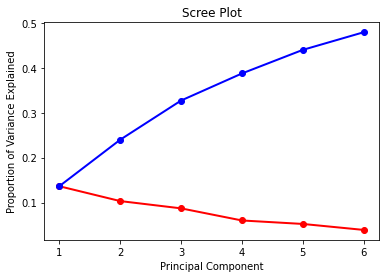

In [ ]:
pca = PCA(n_components =6)
pca.fit(df)
PCA_components = pd.DataFrame(pca.fit_transform(df))
print(pca.explained_variance_ratio_)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xticks(PC_values)
plt.ylabel('Proportion of Variance Explained')
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58922439d0>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58922439d0>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58922439d0>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58922439d0>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.get_version()
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
 config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f58922439d0>
Traceback (most recent call last):
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
 self._make_module_from_path(filepath)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
 module = module_class(filepath, prefix, user_api, internal_api)
 File "/databricks/python/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
 self.version = self.ge

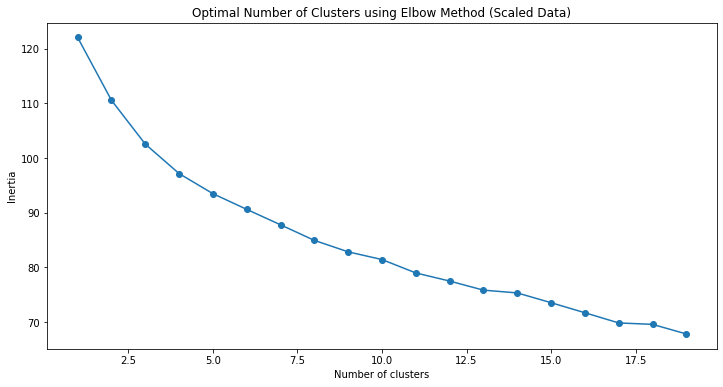

Text(0, 0.5, 'Inertia')

In [ ]:
"""
Using normalised dataframe
"""
sse = []
k_list = range(1, 20)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,20), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
"""KMeans"""
n =4
#Initialize the class object
kmeans = KMeans(n_clusters= n)
kk = kmeans.fit(df)

#predict the labels of clusters.
label2=  kmeans.fit_predict(df)

In [ ]:
print("For each document what class are they into : \n", label2)

count_arr = np.bincount(label2) 
print(count_arr[0])
print(count_arr[1])
print(count_arr[2])
print(count_arr[3])


For each document what class are they into : 
 [0 3 3 1 1 3 2 2 1 1 3 1 3 3 0 3 0 2 3 2 3 1 3 3 3 3 3 2 0 3 2 3 3 3 1 1 2
 3 3 3 3 2 2 0 0 3 2 1 3 2 0 0 0 0 0 0 2 3 2 0 0 1 2 2 1 0 0 0 3 3 3 1 3 0
 3 3 3 3 3 3 1 3 1 2 2 0 0 2 3 2 2 1 2 2 3 3 2 2 3 3 1 3 1 2 2 0 3 2 3 1 0
 2 3 1 2 2 1 3 3 1 1 0 2 0 1 1 1 1 1 3 2 3 3 0 0 2 0 2 0 0 1 2 0 3 1 2 1 1
 1 3]
30
32
36
52

In [ ]:
name = np.array(Dataset['TITLE'])
df['Title'] = name
df['Classification'] = label2


In [ ]:
df['Classification'] = df['Classification'].astype(str)

In [ ]:
from sklearn.manifold import MDS
"""
Visualizing the distance between words  to see what words are the most different from each other 
"""

### Step 1 - Configure MDS function, note we use default hyperparameter values for this example
model2d=MDS(n_components=2, 
          metric=True, 
          n_init=4, 
          max_iter=300, 
          verbose=0, 
          eps=0.001, 
          n_jobs=None, 
          random_state=42, 
          dissimilarity='euclidean')

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
df_1 = df.drop('Title', axis=1)
df_1 = df_1.drop('Classification', axis=1)
X_trans = model2d.fit_transform(df_1)
    
### Step 3 - Print a few stats
print('The new shape of X: ',X_trans.shape)
print('No. of Iterations: ', model2d.n_iter_)
print('Stress: ', model2d.stress_)


The new shape of X: (150, 2)
No. of Iterations: 300
Stress: 1987.5786130101137

In [ ]:
import plotly.express as px # for data visualization
# Create a scatter plot
fig = px.scatter(df, x=X_trans[:,0], y=X_trans[:,1], opacity=1, color= df['Classification'], hover_data = ['Title'])

# Change chart background color
fig.update_layout(dict(plot_bgcolor = 'white'))

# Update axes lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey', 
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey', 
                 showline=True, linewidth=1, linecolor='black')

# Set figure title
fig.update_layout(title_text="MDS Transformation")

# Update marker size
fig.update_traces(marker=dict(size=5,
                             line=dict(color='black', width=0.2)))

fig.show()

In [ ]:
index0  =np.where(label2 == 2)

In [ ]:
index0

Out[41]: (array([ 6, 7, 17, 19, 27, 30, 36, 41, 42, 46, 49, 56, 58,
 62, 63, 83, 84, 87, 89, 90, 92, 93, 96, 97, 103, 104,
 107, 111, 114, 115, 122, 130, 135, 137, 141, 145]),)

In [ ]:

pd.set_option('display.max_rows', 500)
Dataset.where(Dataset['TITLE'] == "laperladelcasino")


In [ ]:
str1 = "<p>¡Tenemos una exclusiva para todos vosotros! Ya está aquí, ya ha llegado a Slot.com Sábado Deluxe, el juego de casino de tu programa favorito. Adéntrate en el plató y descubre lo que se siente al ser la auténtica estrella del Deluxe.</p><p><br></p><p>Siéntete el gran invitado de Sábado Deluxe y gana grandes premios junto a los colaboradores. Además, puedes entrar a dos minijuegos especiales: Elige a tu colaborador favorito o sométete al Polígrafo de la verdad.</p><p><br></p><p>¡Vamos! ¿A qué estás esperando para adentrarte en el plató?</p>	<p>Sábado Deluxe es un exclusivo juego de casino de 3 rodillos y varias líneas con hasta 50 líneas ganadoras. Ganas por combinación de los mismos símbolos de izquierda a derecha, de derecha a izquierda o en scatter.</p><p><br></p><p><strong><u>Figuras especiales de este juego de casino:</u></strong></p><p><strong>- Estrella (Comodín):</strong> Remplaza a todas las figuras excepto a la figura de la luna de Sábado Deluxe (Bonus).</p><p><strong>- Luna de Sábado Deluxe: </strong>Con tres o más símbolos entrarás a los minijuegos de Elige tu colaborador favorito o el Polígrafo de la Verdad.</p><p><br></p><p><strong><u>Minijuegos especiales:</u></strong></p><p><strong>- Elige colaborador:</strong> Deberás elegir tu colaborador favorito. Ganarás el premio que oculte el colaborador. Para entrar a este minijuego debes conseguir 3 o más símbolos de la luna de Sábado Deluxe (Bonus).</p><p><strong>- Polígrafo de la verdad: </strong>Escoge una pregunta para descubrir un premio. ¡Ten cuidado! Si miente a la pregunta, termina el juego y te quedas sin premio. Si aciertas la pregunta, tienes la posibilidad de arriesgarte a responder otra pregunta y así el premio puede ser más grande.</p><p><br></p><p><strong><u>Tabla de premios de Sábado Deluxe:</u></strong></p><p><strong>- Estrella (Comodín): </strong>Las estrellas son los símbolos de mayor recompensa en Sábado Deluxe. Además, sustituyen a todas las figuras excepto a la luna de Sábado Deluxe (Bonus).</p><p><strong>- Colaboradora rubia:</strong> Es el segundo símbolo con mayor recompensa del juego. Solo por detrás de la Estrella (Comodín).</p><p><strong>- Colaborador moreno:</strong> Después de la estrella (comodín) y la colaboradora rubia es el símbolo con mayor recompensa.</p><p><strong>- Colaboradora morena: </strong>Es la cuarta figura con mayor recompensa del juego.</p><p><strong>- Sofá, cámara, foco, micrófono y tarjetas:</strong> Son las figuras de menor recompensa en Sábado Deluxe.</p><p><br></p><p>¿A qué esperas para probar el juego de tu programa favorito? ¡Vamos, juega ahora online a Sábado Deluxe! ¿Conseguirás entrar al minijuego del polígrafo?</p>"

str2 = "<p>Descubre tu máquina de bar favorita… ¡Ahora en versión casino! Nuevos minijuegos te están esperando. ¡Consigue tres estrellas de mar y elige en que minijuego quieres entrar! ¿Eres más de Fiesta Loca, Postureo o de Cócteles?</p>	<p>Esta tragaperras de casino caribeña paga de izquierda a derecha y la ganancia más alta por línea de pago. ¡Adéntrate en el nuevo paraíso del casino y descubre los premios que esconde!</p><p><br></p><p><strong><u>Símbolos especiales de esta tragamonedas de casino:</u></strong></p><p><strong>Wild (Surfera con el pelo de color negro): </strong>Es el símbolo de la chica con el pelo de color negro y sustituye a todos los demás símbolos. Este símbolo actúa como comodín y sustituye todos los símbolos excepto el Scatter (Estrella de mar).</p><p><strong>Scatter o Bonus (Estrella de Mar):</strong> Es el símbolo de la estrella de mar y si consigues 3 o más en cualquier posición entrarás a un minijuego adicional. Concretamente tres nuevos minijuegos en tu máquina de bar favorita en versión casino: La Fiesta Loca, El Postureo y Los Cócteles.</p><p><br></p><p><strong><u>Minijuegos de esta tragamonedas de casino:</u></strong></p><p>Cuando consigas tres símbolos Scatter o Bonus (Estrella de mar) o más tendrás la opción de elegir en que minijuego quieres entrar: La Fiesta Loca, El Postureo o Los Cócteles.</p><p><br></p><p><strong>Fiesta Loca: </strong>Este minijuego consiste en giros gratis. Se sortearán 30, 20, 15 o 12 giros gratis donde las surferas se convertirán en Wild. Es decir, durante estos giros gratis las surferas actuarán como comodín.</p><p><strong>El Postureo:</strong> Este minijuego también consiste en giros gratis. A diferencia de la Fiesta Loca, se sortean 30, 25, 22 o 20 giros gratis y el símbolo Wild (Surfera con el pelo de color negro) se extiende en un rodillo sorteado aleatoriamente.</p><p><strong>Cócteles:</strong> Consiste en seleccionar una bebida del bar y descubrir le premio que esconde. ¡Puedes elegir tantas bebidas como vasos tengas! Ganarás de 2 a 4 vasos según si has conseguido 3 0 5 símbolos de Scatter o Bonus (Estrella de mar). Además, al activar el juego, hay vasos adicionales escondidos entre las bebidas.</p><p><br></p><p><strong><u>Tabla de premios:</u></strong></p><p><strong>- Wild (Surfera con el pelo de color negro):</strong> Es el símbolo de la chica con el pelo de color negro y es el que da una recompensa mayor en esta tragamonedas de casino caribeña.</p><p><strong>- Surfera con el pelo de color castaño:</strong> Es el símbolo de la chica con el pelo de color castaño y es el segundo símbolo con una recompensa mayor en La Perla Del Casino Deluxe.</p><p><strong>- Surfera con el pelo de color rubio: </strong>Es el tercer símbolo con mayor recompensa del juego. Solo por detrás de la chica con el pelo de color negro y la chica con el pelo de color castaño. </p><p><strong>- Surfera encima de la tabla de surf:</strong> Es el cuarto símbolo con mayor recompensa en la tragamonedas de La Perla Del Casino Deluxe.</p><p><strong>- Surfera con el bikini de color verde:</strong> La surfera con el bikini de color verde es la quinta figura con mayor recompensa del juego.</p><p><strong>- Loro: </strong>Es la sexta figura con mayor recompensa del juego.</p><p><strong>- Ermitaño (Cangrejo), pez y flor:</strong> Son las séptimas figuras con mayor recompensa del juego.</p><p><strong>- Estrella de mar, timbales y cocos:</strong> Son las figuras de menor recompensa en La Perla Del Casino.</p><p><br></p><p><strong><u>Otros indicadores generales de este juego de casino online:</u></strong></p><p><strong>Apuesta:</strong> Establece la apuesta que deseas.</p><p><strong>Max:</strong> Establece la apuesta máxima permitida.</p><p><strong>Botón jugar: </strong>Inicia la tirada.</p><p><strong>Auto:</strong> Posibilita la opción de jugar en modo automático.</p><p><br></p><p>¿Te gustan las máquinas de casino caribeñas como La Perla Del Casino? ¡Entonces te gustarán otros como La Perla Del Caribe Deluxe, La Perla Del Caribe Deluxe Gold o Pearl Beauty!</p><p>Juega online gratis a La Perla Del Casino y descubre todos los premios que se esconden en el nuevo paraíso del casino.</p>"

str1_words = set(str1.split())

str2_words = set(str2.split())

common = str1_words & str2_words
common

In [ ]:
pd.set_option('display.max_colwidth', None)
my_array = np.array((np.take(Dataset['TITLE'], index0[0])))

pd.DataFrame(my_array[:], columns = ['Column_A'])

In [ ]:
len(np.array(np.where(label2 == 0))[0])


Out[45]: 30

## Recount words for cluster

In [ ]:
save = []
for i in range(4,5):
     print("for the class {} :".format(i) ,CountingForClass(i,label2), "\n")
     save.append(CountingForClass(i,label2))

for the class 4 : {}

### Recude Text Size

In [ ]:
def reduceTextSize(n_cluster):
  ff_word = []
  #leng = []
  for i in range(0,len(np.array(np.where(label2 == n_cluster))[0])):
    #print(words_text[np.array(np.where(label2 == 0))[0][i]])
    #print("ANTES " , len(words_text[np.array(np.where(label2 == 0))[0][i]]))
    final_words_text = list(dict.fromkeys(words_text[np.array(np.where(label2 == n_cluster))[0][i]]))
    #leng.append(len(final_words_text))
    ff_word.append(final_words_text)
    
  print()
  return ff_word
  #,leng


In [ ]:
reduceTextSize(0)

#type(np.concatenate(reduceTextSize(0)))

In [ ]:
import collections
d1 = collections.Counter(np.concatenate(reduceTextSize(0)))


### Full Dictionary

In [ ]:
from collections import defaultdict

def FullDictionaryWords(cluster):
 
  d2 = collections.Counter(np.concatenate(reduceTextSize(cluster)))
  print(len(d2))
  dd = defaultdict(list)
  d1 = save[cluster]
  for d in (d1, d2): # you can list as many input dicts as you want here
      for key, value in d.items():
          dd[key].append(value)

  return dd


In [ ]:
x = FullDictionaryWords(3)
print(len(x))
sorted(x.items(), key=lambda x: x[1][1], reverse=True)

In [ ]:
w1 = words_text[45]
w2 =words_text[83]
a = w1
b = w2
c = set(a) & set(b)
print(c)

In [ ]:

#filter rows of original data
filtered_label0 = PCA_components[label2 == 0]
filtered_label1 = PCA_components[label2 == 1]
filtered_label2 = PCA_components[label2 == 2]
filtered_label3 = PCA_components[label2 == 3]
filtered_label4 = PCA_components[label2 == 4]
filtered_label5 = PCA_components[label2 == 5]
filtered_label6 = PCA_components[label2 == 6]
filtered_label7 = PCA_components[label2 == 7]
filtered_label8 = PCA_components[label2 == 8]
filtered_label9 = PCA_components[label2 == 9]
#plotting the results of individual clusters meaning. This plot is not representative 
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1])
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1])
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1])
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1])
plt.scatter(filtered_label4.iloc[:,0] , filtered_label4.iloc[:,1])
plt.scatter(filtered_label5.iloc[:,0] , filtered_label5.iloc[:,1])
plt.scatter(filtered_label6.iloc[:,0] , filtered_label6.iloc[:,1])
plt.scatter(filtered_label7.iloc[:,0] , filtered_label7.iloc[:,1])
#plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1])

#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.show()

In [ ]:
for i in range(0,n):
   print("for the class {} :".format(i) ,CountingForClass(i,label2), "\n")